# Energy Trade Analysis 

Data Analysis project using data from https://www.kaggle.com/datasets/unitednations/international-energy-statistics?select=all_energy_statistics.csv to analyze total energy production, usage and exchange trends across different countries from 1990 - 2015 for different types of energies

## Data Collection and Exploration 

In [1]:
#Import relevant modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

import os
print(os.listdir("../Energy Trade Analysis")) # Any results written in the current directory will be saved as output.

#Explore the all_energy_statistics.csv dataset
df = pd.read_csv('all_energy_statistics.csv')
dfhead = df.head()
display(HTML(dfhead.to_html()))

#List the variables
print(df.columns)
#Store the dataframe as a matrix
dfmatrix = df.to_numpy()

['Energy-Questionnaire-Guidelines.pdf', 'Part1_figs', '.DS_Store', 'Energy Trade Analysis.ipynb', 'ETA Report.docx', 'all_energy_statistics.csv', 'ETA Report.pdf', 'Part3_figs', '.git', 'archive.zip', 'Part2_figs']
Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'quantity_footnotes', 'category'],
      dtype='object')


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [2]:
# Determine the data type of each column
print(df.dtypes)

# Determine the unique values of each categorical variable i.e. country_or_area,
# commodity_transaction, unit, category and store them as lists
print(df.country_or_area.unique())
print(df.commodity_transaction.unique())
print(df.unit.unique())
print(df.quantity_footnotes.unique())
energytypes = df.category.unique()
print(energytypes)

country_or_area           object
commodity_transaction     object
year                       int64
unit                      object
quantity                 float64
quantity_footnotes       float64
category                  object
dtype: object
['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'Korea, Republic of' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'United Kingdom' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Argentina'
 'Colombia' 'Germany' 'Norway' 'Australia' 'China, Macao SAR' 'Japan'
 'Denmark' 'Ireland' 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia'
 'Lesotho' 'Nepal' 'Niger' 'Pakistan' 'Serbia and Montenegro' 'Tunisia'
 'Botswana' 'Georgia' 'Republic of Moldova' 'Peru' 'South Africa'
 'Iceland' 'Latvia' 'Luxembourg' 'Cuba' 'Kyrg

In [3]:
# We must verify that all values are non-null
print(df.country_or_area.isnull().sum())
print(df.commodity_transaction.isnull().sum())
print(df.year.isnull().sum())
print(df.category.isnull().sum())
print(df.quantity.isnull().sum())
print(df.unit.isnull().sum())

0
0
0
0
0
0


## Data Cleaning

In [4]:
# drop the quantity_footnotes variable as it does not add value to the analysis
df = df.drop(labels="quantity_footnotes", axis=1)
# simplify the dataset by renaming the columns
df.columns = ["country", "commodity", "year", "unit", "quantity", "category"]
df.head()
# remove the energy types that are not being considered
energytypes = np.delete(energytypes, 20)
energytypes = np.delete(energytypes, 68)

## Data Preprocessing

In [5]:
# We want to create a dictionary that stores the unit associated with each energy
# category, assuming that each category has the same units as it should be.

for category in energytypes:
    dftemp = df[df["category"] == category].head(1)
    display(HTML(dftemp.to_html()))
    print(dftemp.category)
    print(dftemp.unit)

,country,commodity,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates


0    additives_and_oxygenates
Name: category, dtype: object
0    Metric tons,  thousand
Name: unit, dtype: object
3018    animal_waste
Name: category, dtype: object
3018    Terajoules
Name: unit, dtype: object
4940    anthracite
Name: category, dtype: object
4940    Metric tons,  thousand
Name: unit, dtype: object
9834    aviation_gasoline
Name: category, dtype: object
9834    Metric tons,  thousand
Name: unit, dtype: object
28005    bagasse
Name: category, dtype: object
28005    Metric tons,  thousand
Name: unit, dtype: object
40584    biodiesel
Name: category, dtype: object
40584    Metric tons,  thousand
Name: unit, dtype: object
45152    biogases
Name: category, dtype: object
45152    Terajoules
Name: unit, dtype: object
56037    biogasoline
Name: category, dtype: object
56037    Metric tons,  thousand
Name: unit, dtype: object
59908    bitumen
Name: category, dtype: object
59908    Metric tons,  thousand
Name: unit, dtype: object
80651    black_liquor
Name: category, dtype: object

,country,commodity,year,unit,quantity,category
3018,United States,Animal waste - Consumption by commerce and public services,2014,Terajoules,42805.0,animal_waste


,country,commodity,year,unit,quantity,category
4940,Bulgaria,Anthracite - commerce and public services,2014,"Metric tons, thousand",2.0,anthracite


,country,commodity,year,unit,quantity,category
9834,Swaziland,"Aviation gasoline - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",0.15,aviation_gasoline


,country,commodity,year,unit,quantity,category
28005,Australia,Bagasse - Consumption by chemical and petrochemical,2014,"Metric tons, thousand",66.303208,bagasse


,country,commodity,year,unit,quantity,category
40584,Austria,"Biodiesel - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",17.0,biodiesel


,country,commodity,year,unit,quantity,category
45152,Austria,"Biogases - Consumption by agriculture, forestry and fishing",2014,Terajoules,1.0,biogases


,country,commodity,year,unit,quantity,category
56037,Brazil,"Biogasoline - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",17.0,biogasoline


,country,commodity,year,unit,quantity,category
59908,Azerbaijan,Bitumen - Consumption by chemical and petrochemical,2010,"Metric tons, thousand",1.0,bitumen


,country,commodity,year,unit,quantity,category
80651,Finland,Black Liquor - Consumption by food and tobacco,2014,Terajoules,18.0,black_liquor


,country,commodity,year,unit,quantity,category
84805,China,Blast Furnace Gas - Consumption by chemical and petrochemical,2014,Terajoules,4582.9,blast_furnace_gas


,country,commodity,year,unit,quantity,category
96768,Czechia,Brown coal briquettes - consumption by briquetting plants,2013,"Metric tons, thousand",0.0,brown_coal_briquettes


,country,commodity,year,unit,quantity,category
102671,Australia,Brown coal - changes in stocks,2002,"Metric tons, thousand",2934.0,brown_coal


,country,commodity,year,unit,quantity,category
122400,Azerbaijan,"Charcoal - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",1.0,charcoal


,country,commodity,year,unit,quantity,category
150400,Australia,Coal Tar - Consumption by chemical and petrochemical,2014,"Metric tons, thousand",0.0,coal_tar


,country,commodity,year,unit,quantity,category
152645,Poland,"Coke Oven Gas - Consumption by agriculture, forestry and fishing",1991,Terajoules,2.0,coke_oven_coke


,country,commodity,year,unit,quantity,category
164491,Kazakhstan,"Coking coal - consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",2.0,coking_coal


,country,commodity,year,unit,quantity,category
170961,Colombia,"Conventional crude oil - consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",21.0,conventional_crude_oil


,country,commodity,year,unit,quantity,category
198313,Croatia,"Direct use of geothermal heat - Consumption by agriculture, forestry and fishing",2014,Terajoules,169.0,direct_use_of_geothermal_heat


,country,commodity,year,unit,quantity,category
200749,Austria,"Direct use of solar thermal heat - Consumption by agriculture, forestry and fishing",2014,Terajoules,93.0,direct_use_of_solar_thermal_heat


,country,commodity,year,unit,quantity,category
254627,Australia,Ethane - Consumption by chemical and petrochemical,2008,"Metric tons, thousand",19.0,ethane


,country,commodity,year,unit,quantity,category
256641,Afghanistan,Falling water - total hydraulic resources,2008,"Kilowatt-hours, million",394000.0,falling_water


,country,commodity,year,unit,quantity,category
257603,Albania,Fuel oil - Consumption by chemical and petrochemical,2014,"Metric tons, thousand",0.0,fuel_oil


,country,commodity,year,unit,quantity,category
332735,Belarus,Fuelwood - Consumption by chemical and petrochemical,2014,"Cubic metres, thousand",1.20416,fuelwood


,country,commodity,year,unit,quantity,category
384767,Poland,Gas Coke - Consumption by commerce and public services,1992,"Metric tons, thousand",7.0,gas_coke


,country,commodity,year,unit,quantity,category
385132,Albania,Gas Oil/ Diesel Oil - Consumption by chemical and petrochemical,2014,"Metric tons, thousand",0.8,gas_oil_diesel_oil


,country,commodity,year,unit,quantity,category
482777,Austria,Gasoline-type jet fuel - Consumption by domestic aviation,2014,"Metric tons, thousand",0.0,gasoline_type_jet_fuel


,country,commodity,year,unit,quantity,category
484070,Australia,Gasworks Gas - Consumption by chemical and petrochemical,2005,Terajoules,4899.0,gasworks_gas


,country,commodity,year,unit,quantity,category
490912,Australia,Electricity - total geothermal production,2014,"Kilowatt-hours, million",1.0,geothermal


,country,commodity,year,unit,quantity,category
491408,Afghanistan,Coal - additional resources,1994,"Metric tons, thousand",400000.0,hard_coal


,country,commodity,year,unit,quantity,category
533715,Austria,From chemical sources – Autoproducer,2014,Terajoules,95.0,heat


,country,commodity,year,unit,quantity,category
563371,Afghanistan,Electricity - total hydro production,2014,"Kilowatt-hours, million",895.3,hydro


,country,commodity,year,unit,quantity,category
567115,Czechia,"Industrial Waste - Consumption by agriculture, forestry and fishing",2002,Terajoules,12.0,industrial_waste


,country,commodity,year,unit,quantity,category
575674,Costa Rica,Kerosene-type Jet Fuel - Consumption by chemical and petrochemical,2012,"Metric tons, thousand",0.0,kerosene_type_jet_fuel


,country,commodity,year,unit,quantity,category
610232,Bulgaria,"Lignite - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",4.0,lignite


,country,commodity,year,unit,quantity,category
622693,Albania,Liquefied petroleum gas (LPG) - consumption by chemical and petrochemical,2014,"Metric tons, thousand",1.34,liquified_petroleum_gas


,country,commodity,year,unit,quantity,category
684849,Japan,"Lubricants - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",35.0,lubricants


,country,commodity,year,unit,quantity,category
706223,Albania,Motor Gasoline - Consumption by chemical and petrochemical,2007,"Metric tons, thousand",2.0,motor_gasoline


,country,commodity,year,unit,quantity,category
759421,Slovakia,Municipal Waste - Losses,2012,Terajoules,0.0,municipal_wastes


,country,commodity,year,unit,quantity,category
766221,Belgium,Naphtha - Consumption by chemical and petrochemical,2014,"Metric tons, thousand",1170.0,naphtha


,country,commodity,year,unit,quantity,category
782190,Albania,Natural gas (including LNG) - consumption by chemical and petrochemical,1996,Terajoules,323.0,natural_gas_including_lng


,country,commodity,year,unit,quantity,category
846351,United States,"Natural gas liquids - Consumption by agriculture, forestry and fishing",2011,"Metric tons, thousand",34.0,natural_gas_liquids


,country,commodity,year,unit,quantity,category
854930,Argentina,Electricity - total nuclear production,2014,"Kilowatt-hours, million",5756.0,nuclear_electricity


,country,commodity,year,unit,quantity,category
855686,Austria,"Of which: biodiesel - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",16.0,of_which_biodiesel


,country,commodity,year,unit,quantity,category
858310,Finland,"Of which: biogasoline - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",1.0,of_which_biogasoline


,country,commodity,year,unit,quantity,category
860480,Estonia,Oil shale - consumption by chemical and petrochemical industry,1998,"Metric tons, thousand",27.0,oil_shale_oil_sands


,country,commodity,year,unit,quantity,category
861236,Austria,"Other bituminous coal - consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",0.0,other_bituminous_coal


,country,commodity,year,unit,quantity,category
884374,Georgia,"Other coal products - Consumption by manufacturing, construction and non-fuel mining industry",2014,"Metric tons, thousand",0.3,other_coal_products


,country,commodity,year,unit,quantity,category
884479,Canada,Other hydrocarbons - exports,2014,"Metric tons, thousand",25016.0,other_hydrocarbons


,country,commodity,year,unit,quantity,category
886441,Australia,Other kerosene - Consumption by chemical and petrochemical,2014,"Metric tons, thousand",2.0,other_kerosene


,country,commodity,year,unit,quantity,category
929907,Belgium,"Other liquid biofuels - Consumption by agriculture, forestry and fishing",2013,"Metric tons, thousand",0.0,other_liquid_biofuels


,country,commodity,year,unit,quantity,category
931524,Albania,"Other oil products n.e.c. - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",3.5,other_oil_products_n_e_c


,country,commodity,year,unit,quantity,category
953605,Czechia,Other recovered gases - Consumption by chemical and petrochemical,2014,Terajoules,1238.0,other_recovered_gases


,country,commodity,year,unit,quantity,category
955710,Argentina,"Vegetal waste - Consumption by agriculture, forestry and fishing",2014,Terajoules,6400.0,other_vegetal_material_and_residues


,country,commodity,year,unit,quantity,category
969669,China,Paraffin waxes - Consumption by chemical and petrochemical,2014,"Metric tons, thousand",5.7,paraffin_waxes


,country,commodity,year,unit,quantity,category
977597,Hungary,"Patent fuel - consumption by agriculture, forestry and fishing",2001,"Metric tons, thousand",6.0,patent_fuel


,country,commodity,year,unit,quantity,category
980832,Belarus,"Peat - consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",0.0,peat


,country,commodity,year,unit,quantity,category
986145,Belarus,"Peat products - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",9.0,peat_products


,country,commodity,year,unit,quantity,category
987852,Albania,Petroleum coke - consumption by chemical and petrochemical,2014,"Metric tons, thousand",6.3,petroleum_coke


,country,commodity,year,unit,quantity,category
1004346,Aruba,Feedstocks - exports,2014,"Metric tons, thousand",0.0,refinery_feedstocks


,country,commodity,year,unit,quantity,category
1010042,Argentina,Refinery gas - consumption by chemical and petrochemical,2003,"Metric tons, thousand",7.0,refinery_gas


,country,commodity,year,unit,quantity,category
1025748,American Samoa,Electricity - total solar production,2014,"Kilowatt-hours, million",1.1,solar_electricity


,country,commodity,year,unit,quantity,category
1026701,Hungary,"Sub-bituminous coal - Consumption by agriculture, forestry and fishing",2014,"Metric tons, thousand",0.0,sub_bituminous_coal


,country,commodity,year,unit,quantity,category
1032106,Afghanistan,Electricity - total thermal production,2014,"Kilowatt-hours, million",154.0,thermal_electricity


,country,commodity,year,unit,quantity,category
1037595,Canada,"Electricity - total tide, wave production",2014,"Kilowatt-hours, million",16.0,tide_wave_and_ocean_electricity


,country,commodity,year,unit,quantity,category
1037653,Albania,Electricity - Consumption by chemical and petrochemical,2014,"Kilowatt-hours, million",116.65,total_electricity


,country,commodity,year,unit,quantity,category
1171569,Albania,Total refinery output,2014,"Metric tons, thousand",335.61,total_refinery_output


,country,commodity,year,unit,quantity,category
1177352,Argentina,Uranium - estimated additional reserves,2011,Metric Tons,11000.0,uranium


,country,commodity,year,unit,quantity,category
1188115,Argentina,Electricity - total wind production,2014,"Kilowatt-hours, million",730.0,wind_electricity


In [6]:
# Creating the dictionary

mydict = dict()
for category in energytypes:
    dftemp = df[df["category"] == category].head(1)
    mydict[str(dftemp.category).split("    ")[1].splitlines()[0]] = (
        str(dftemp.unit).split("    ")[1].splitlines()[0]
    )

print(mydict)

{'additives_and_oxygenates': 'Metric tons,  thousand', 'animal_waste': 'Terajoules', 'anthracite': 'Metric tons,  thousand', 'aviation_gasoline': 'Metric tons,  thousand', 'bagasse': 'Metric tons,  thousand', 'biodiesel': 'Metric tons,  thousand', 'biogases': 'Terajoules', 'biogasoline': 'Metric tons,  thousand', 'bitumen': 'Metric tons,  thousand', 'black_liquor': 'Terajoules', 'blast_furnace_gas': 'Terajoules', 'brown_coal_briquettes': 'Metric tons,  thousand', 'brown_coal': 'Metric tons,  thousand', 'charcoal': 'Metric tons,  thousand', 'coal_tar': 'Metric tons,  thousand', 'coke_oven_coke': 'Terajoules', 'coking_coal': 'Metric tons,  thousand', 'conventional_crude_oil': 'Metric tons,  thousand', 'direct_use_of_geothermal_heat': 'Terajoules', 'direct_use_of_solar_thermal_heat': 'Terajoules', 'ethane': 'Metric tons,  thousand', 'falling_water': 'Kilowatt-hours, million', 'fuel_oil': 'Metric tons,  thousand', 'fuelwood': 'Cubic metres, thousand', 'gas_coke': 'Metric tons,  thousand', 

In [7]:
# Create new function to obtain total PEU (production,energy,usage) of a given energy category
# for a given dataframe
def Total_PEU(category, df):
    dftemp = df[df["category"] == category]
    total = dftemp["quantity"].sum()
    return total

In [8]:
# Create a new dataframe with 3 columns: Category, Total PEU, Unit

# first create the data dictionary
data = dict()
data["category"] = []
data["total_PEU"] = []
data["unit"] = []

for category in energytypes:
    data["category"].append(category)
    data["total_PEU"].append(Total_PEU(category, df))
    data["unit"].append(mydict[category])

print(data)

{'category': ['additives_and_oxygenates', 'animal_waste', 'anthracite', 'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases', 'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas', 'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar', 'coke_oven_coke', 'coking_coal', 'conventional_crude_oil', 'direct_use_of_geothermal_heat', 'direct_use_of_solar_thermal_heat', 'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke', 'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas', 'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste', 'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas', 'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha', 'natural_gas_including_lng', 'natural_gas_liquids', 'nuclear_electricity', 'of_which_biodiesel', 'of_which_biogasoline', 'oil_shale_oil_sands', 'other_bituminous_coal', 'other_coal_products', 'other_hydrocarbons', 'other_kerosene', 'other_liquid_biofuels', 'other_oil_products_n_e_c', 'other_recover

In [9]:
# Create a new dataframe with the above data dictionary
df_peu = pd.DataFrame(data)
display(HTML(df_peu.to_html()))

,category,total_PEU,unit
0,additives_and_oxygenates,1.072431e+06,"Metric tons, thousand"
1,animal_waste,9.788803e+07,Terajoules
2,anthracite,2.614395e+06,"Metric tons, thousand"
3,aviation_gasoline,3.305157e+05,"Metric tons, thousand"
4,bagasse,4.800139e+07,"Metric tons, thousand"
5,biodiesel,1.234106e+06,"Metric tons, thousand"
6,biogases,4.531908e+07,Terajoules
7,biogasoline,4.642501e+06,"Metric tons, thousand"
8,bitumen,1.275569e+07,"Metric tons, thousand"
9,black_liquor,2.398044e+08,Terajoules


In [10]:
# Create list of unique unit types in dataset such as Terajoules, Kilowatt-hours etc.
unittypes = df_peu.unit.unique()

In [11]:
def printdf(df):  # takes in dataframe, outputs as HTML display
    display(HTML(df.to_html()))

## Data Analysis

### Comparative Analysis

#### Energy Sources Grouped by Unit

In [12]:
# ENERGY SOURCES GROUPED BY UNIT - create a PEU dataframe for each unit

dict_peu_byunit = dict()  # A unit-dataframe type dictionary

for unit in unittypes:
    dict_peu_byunit[unit] = df_peu[df_peu["unit"] == unit]

# Each unit key in dict_peu_unit has a value of a PEU dataframe of that unit only

for unit in unittypes:
    display(HTML(dict_peu_byunit[unit].head().to_html()))

,category,total_PEU,unit
0,additives_and_oxygenates,1.072431e+06,"Metric tons, thousand"
2,anthracite,2.614395e+06,"Metric tons, thousand"
3,aviation_gasoline,3.305157e+05,"Metric tons, thousand"
4,bagasse,4.800139e+07,"Metric tons, thousand"
5,biodiesel,1.234106e+06,"Metric tons, thousand"


,category,total_PEU,unit
1,animal_waste,9.788803e+07,Terajoules
6,biogases,4.531908e+07,Terajoules
9,black_liquor,2.398044e+08,Terajoules
10,blast_furnace_gas,3.629262e+08,Terajoules
15,coke_oven_coke,3.159087e+08,Terajoules


,category,total_PEU,unit
21,falling_water,2.384865e+08,"Kilowatt-hours, million"
28,geothermal,1.344934e+06,"Kilowatt-hours, million"
31,hydro,7.284826e+07,"Kilowatt-hours, million"
42,nuclear_electricity,6.258632e+07,"Kilowatt-hours, million"
61,solar_electricity,5.838975e+05,"Kilowatt-hours, million"


,category,total_PEU,unit
23,fuelwood,3.593265e+08,"Cubic metres, thousand"


,category,total_PEU,unit
67,uranium,11542386.7,Metric Tons


#### Energy Usage grouped by Country

In [13]:
# GROUPING BY COUNTRIES - create a PEU dataframe for each country

# Create function dataframe_PEU: DataFrame of original type -> DataFrame of PEU type


def dataframe_PEU(df):
    data = dict()
    data["category"] = []
    data["total_PEU"] = []
    data["unit"] = []

    for category in energytypes:
        data["category"].append(category)
        data["total_PEU"].append(Total_PEU(category, df))
        data["unit"].append(mydict[category])
    df_peu = pd.DataFrame(data)
    return df_peu


# Create a country-dataframe type dictionary that stores countries as keys and their
# corresponding PEU dataframe as value
countries = df.country.unique()
dict_peu_bycountry = dict()
for country in countries:
    dict_peu_bycountry[country] = dataframe_PEU(df[df["country"] == country])

#### Energy Usage grouped by Year

In [14]:
# GROUPING BY YEARS - create a PEU dataframe for each year

years = df.year.unique()
dict_peu_byyear = dict()
for year in years:
    dict_peu_byyear[year] = dataframe_PEU(df[df["year"] == year])

# Display the head of the PEU dataframe for each year
for year in years:
    display(HTML(dict_peu_byyear[year].head().to_html()))

,category,total_PEU,unit
0,additives_and_oxygenates,5.039900e+04,"Metric tons, thousand"
1,animal_waste,3.494641e+06,Terajoules
2,anthracite,1.826100e+04,"Metric tons, thousand"
3,aviation_gasoline,1.290567e+04,"Metric tons, thousand"
4,bagasse,1.616966e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,4.692000e+04,"Metric tons, thousand"
1,animal_waste,3.899931e+06,Terajoules
2,anthracite,1.645500e+04,"Metric tons, thousand"
3,aviation_gasoline,1.349609e+04,"Metric tons, thousand"
4,bagasse,1.530235e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,5.637321e+04,"Metric tons, thousand"
1,animal_waste,6.118602e+06,Terajoules
2,anthracite,2.340141e+05,"Metric tons, thousand"
3,aviation_gasoline,1.166740e+04,"Metric tons, thousand"
4,bagasse,2.779829e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,4.713062e+04,"Metric tons, thousand"
1,animal_waste,6.031976e+06,Terajoules
2,anthracite,2.548068e+05,"Metric tons, thousand"
3,aviation_gasoline,1.194330e+04,"Metric tons, thousand"
4,bagasse,2.739399e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,4.626713e+04,"Metric tons, thousand"
1,animal_waste,5.658107e+06,Terajoules
2,anthracite,2.560437e+05,"Metric tons, thousand"
3,aviation_gasoline,1.202348e+04,"Metric tons, thousand"
4,bagasse,2.598895e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,4.451940e+04,"Metric tons, thousand"
1,animal_waste,5.463051e+06,Terajoules
2,anthracite,2.509486e+05,"Metric tons, thousand"
3,aviation_gasoline,1.228012e+04,"Metric tons, thousand"
4,bagasse,2.440484e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,4.212929e+04,"Metric tons, thousand"
1,animal_waste,5.042832e+06,Terajoules
2,anthracite,2.103165e+05,"Metric tons, thousand"
3,aviation_gasoline,1.218208e+04,"Metric tons, thousand"
4,bagasse,2.302435e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,3.737133e+04,"Metric tons, thousand"
1,animal_waste,4.247057e+06,Terajoules
2,anthracite,1.801780e+05,"Metric tons, thousand"
3,aviation_gasoline,1.141300e+04,"Metric tons, thousand"
4,bagasse,2.175770e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,5.800400e+04,"Metric tons, thousand"
1,animal_waste,3.193514e+06,Terajoules
2,anthracite,1.775100e+04,"Metric tons, thousand"
3,aviation_gasoline,1.254142e+04,"Metric tons, thousand"
4,bagasse,1.612981e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,3.964260e+04,"Metric tons, thousand"
1,animal_waste,4.321312e+06,Terajoules
2,anthracite,2.085899e+05,"Metric tons, thousand"
3,aviation_gasoline,1.223681e+04,"Metric tons, thousand"
4,bagasse,2.442361e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,3.677323e+04,"Metric tons, thousand"
1,animal_waste,4.311909e+06,Terajoules
2,anthracite,1.897010e+05,"Metric tons, thousand"
3,aviation_gasoline,1.233506e+04,"Metric tons, thousand"
4,bagasse,2.382406e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,3.730200e+04,"Metric tons, thousand"
1,animal_waste,4.149425e+06,Terajoules
2,anthracite,1.548400e+05,"Metric tons, thousand"
3,aviation_gasoline,1.270880e+04,"Metric tons, thousand"
4,bagasse,2.022395e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,4.248600e+04,"Metric tons, thousand"
1,animal_waste,4.893175e+06,Terajoules
2,anthracite,1.516960e+05,"Metric tons, thousand"
3,aviation_gasoline,1.334691e+04,"Metric tons, thousand"
4,bagasse,2.005346e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,4.257400e+04,"Metric tons, thousand"
1,animal_waste,3.927187e+06,Terajoules
2,anthracite,1.273880e+05,"Metric tons, thousand"
3,aviation_gasoline,1.319481e+04,"Metric tons, thousand"
4,bagasse,2.035096e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,5.222100e+04,"Metric tons, thousand"
1,animal_waste,3.339820e+06,Terajoules
2,anthracite,7.833100e+04,"Metric tons, thousand"
3,aviation_gasoline,1.805849e+04,"Metric tons, thousand"
4,bagasse,1.908389e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,5.948600e+04,"Metric tons, thousand"
1,animal_waste,3.094332e+06,Terajoules
2,anthracite,5.896400e+04,"Metric tons, thousand"
3,aviation_gasoline,1.777052e+04,"Metric tons, thousand"
4,bagasse,1.885748e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,5.860700e+04,"Metric tons, thousand"
1,animal_waste,3.318533e+06,Terajoules
2,anthracite,5.179800e+04,"Metric tons, thousand"
3,aviation_gasoline,1.241151e+04,"Metric tons, thousand"
4,bagasse,1.673699e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,6.053200e+04,"Metric tons, thousand"
1,animal_waste,3.595828e+06,Terajoules
2,anthracite,4.773800e+04,"Metric tons, thousand"
3,aviation_gasoline,1.241088e+04,"Metric tons, thousand"
4,bagasse,1.645515e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,6.243600e+04,"Metric tons, thousand"
1,animal_waste,3.501214e+06,Terajoules
2,anthracite,1.722300e+04,"Metric tons, thousand"
3,aviation_gasoline,1.301403e+04,"Metric tons, thousand"
4,bagasse,1.712899e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,5.579100e+04,"Metric tons, thousand"
1,animal_waste,3.314007e+06,Terajoules
2,anthracite,1.831900e+04,"Metric tons, thousand"
3,aviation_gasoline,1.310895e+04,"Metric tons, thousand"
4,bagasse,1.589378e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,3.810600e+04,"Metric tons, thousand"
1,animal_waste,3.351469e+06,Terajoules
2,anthracite,1.532100e+04,"Metric tons, thousand"
3,aviation_gasoline,1.329293e+04,"Metric tons, thousand"
4,bagasse,1.433556e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,3.578700e+04,"Metric tons, thousand"
1,animal_waste,2.631714e+06,Terajoules
2,anthracite,1.352000e+04,"Metric tons, thousand"
3,aviation_gasoline,1.320826e+04,"Metric tons, thousand"
4,bagasse,1.358324e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,9.972000e+03,"Metric tons, thousand"
1,animal_waste,2.582311e+06,Terajoules
2,anthracite,1.452500e+04,"Metric tons, thousand"
3,aviation_gasoline,1.348139e+04,"Metric tons, thousand"
4,bagasse,1.453875e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,9.073000e+03,"Metric tons, thousand"
1,animal_waste,2.189439e+06,Terajoules
2,anthracite,1.347400e+04,"Metric tons, thousand"
3,aviation_gasoline,1.397622e+04,"Metric tons, thousand"
4,bagasse,1.373731e+06,"Metric tons, thousand"


,category,total_PEU,unit
0,additives_and_oxygenates,2.528000e+03,"Metric tons, thousand"
1,animal_waste,2.216644e+06,Terajoules
2,anthracite,1.419300e+04,"Metric tons, thousand"
3,aviation_gasoline,1.550756e+04,"Metric tons, thousand"
4,bagasse,1.281676e+06,"Metric tons, thousand"


### Data Visualization

The total PEU (Production, Exchange and Usage) stats of energy usage will be displayed for each energy type, by year and by country in pie charts, scatter plots and bar charts respectively

#### Total Energy Usage - Pie Charts

We want to display the total PEU stats of each category type over the years for all countries combined. This will be displayed in pie charts and grouped according to the unit of measurement as that is the only way to derive insight on the relative usage. 

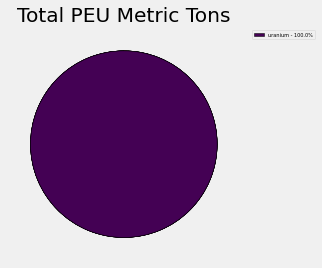

In [20]:
# Visualization of total energy statistics by energy type

from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")
colormap = colors_from_colormap = plt.cm.viridis
colors = colormap(np.linspace(0, 1, 5))

# Obtain the data for each unit type

for unit in unittypes:
    dataframe = dict_peu_byunit[unit]
    lst = dataframe["total_PEU"].tolist()
    order = np.argsort(lst)
    order = order[::-1]
    sortlst = np.array(dataframe["total_PEU"].tolist())[order]
    slices = sortlst[:5]
    labels = np.array(dataframe["category"].tolist())[order][:5]
    total = sum(slices)
    percentages = [(slicer / total) * 100 for slicer in slices]
    plt.pie(
        slices,
        colors=colors,
        startangle=90,
        wedgeprops={"edgecolor": "black", "linewidth": 0.5, "antialiased": True},
    )
    legend_labels = [
        f"{label} - {percentage:.1f}%" for label, percentage in zip(labels, percentages)
    ]
    plt.legend(
        labels=legend_labels, bbox_to_anchor=(1.04, 1), loc="upper left", fontsize="5"
    )
    plt.title("Total PEU " + unit)
    plt.savefig("Part1_figs/" + unit + ".png", dpi=300, bbox_inches="tight")
# slices = [70, 30]
# labels = ['dems', 'republicans']
# plt.pie(slices, labels=labels)
# plt.title('My Pie Chart')
# plt.tight_layout()
# plt.show()

#### Total PEU Stats by Year - Scatter Plot

We want to display the total PEU stats of each energy category by year in a scatter plot. 

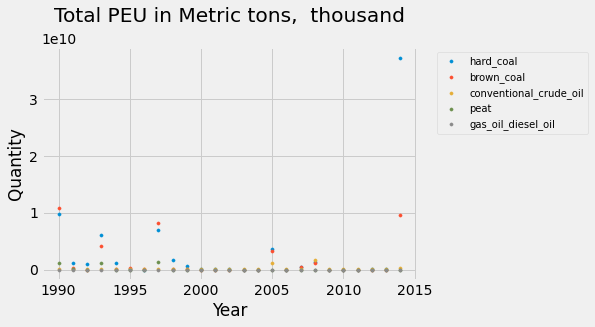

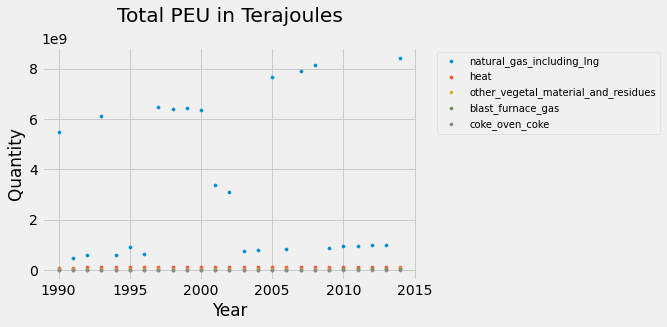

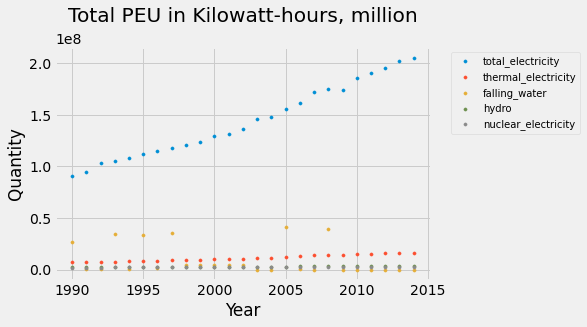

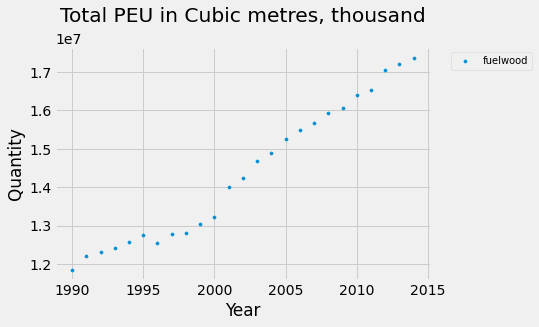

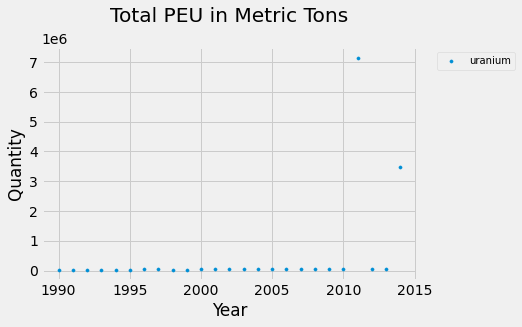

In [39]:
# Visualization of total PEU stats by year - top 5
import numpy as np

top5dict = {
    "Cubic metres, thousand": ["fuelwood"],
    "Kilowatt-hours, million": [
        "total_electricity",
        "thermal_electricity",
        "falling_water",
        "hydro",
        "nuclear_electricity",
    ],
    "Metric tons,  thousand": [
        "hard_coal",
        "brown_coal",
        "conventional_crude_oil",
        "peat",
        "gas_oil_diesel_oil",
    ],
    "Metric Tons": ["uranium"],
    "Terajoules": [
        "natural_gas_including_lng",
        "heat",
        "other_vegetal_material_and_residues",
        "blast_furnace_gas",
        "coke_oven_coke",
    ],
}

for unit in unittypes:
    energies = top5dict[unit]
    plt.figure()
    plt.ylabel("Quantity")
    plt.xlabel("Year")
    labels = []
    for energy in energies:
        times = []
        qtys = []
        for year in years:
            times.append(year)
            df1 = dict_peu_byyear[year]
            df1 = df1[df1["unit"] == unit]
            df1 = df1[df1["category"] == energy]
            # display(HTML(df1.to_html()))
            if not df1.empty:
                # print(df1['total_PEU'].iloc[-1])
                qtys.append(df1["total_PEU"].iloc[-1])
            else:
                qtys.append(0.0)

        order = np.argsort(times)
        xs = np.array(times)[order]
        ys = np.array(qtys)[order]
        plt.scatter(xs, ys, s=10)
        labels.append(energy)
    plt.title("Total PEU in " + unit, pad=25)
    plt.legend(labels, bbox_to_anchor=(1.04, 1), loc="upper left", fontsize="10")
    plt.savefig("Part2_figs/" + "Yearly " + unit + " PEU", bbox_inches="tight", dpi=200)

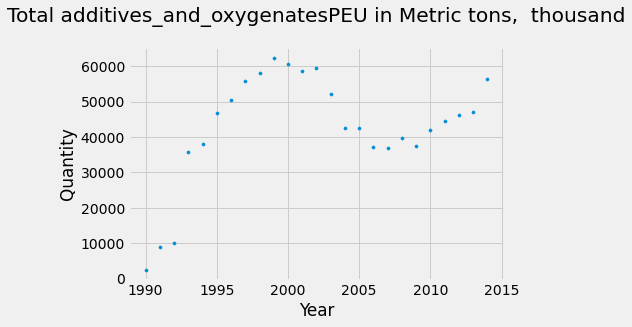

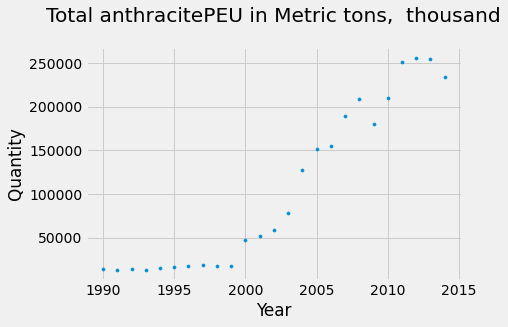

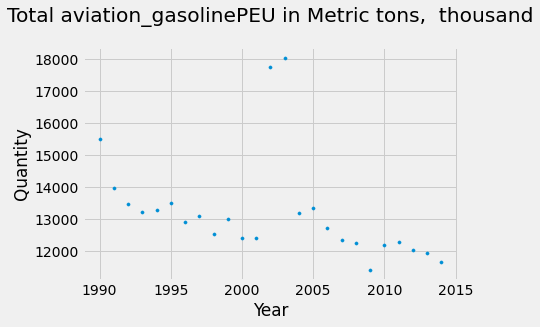

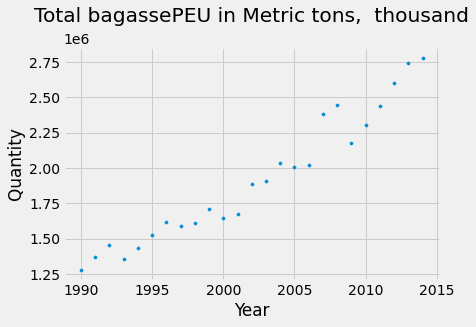

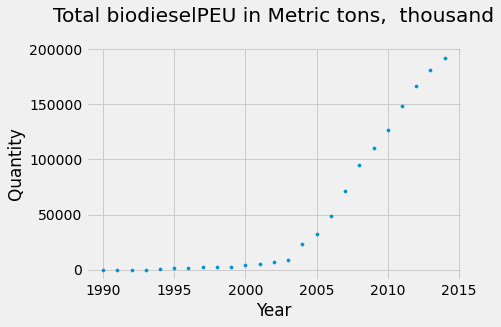

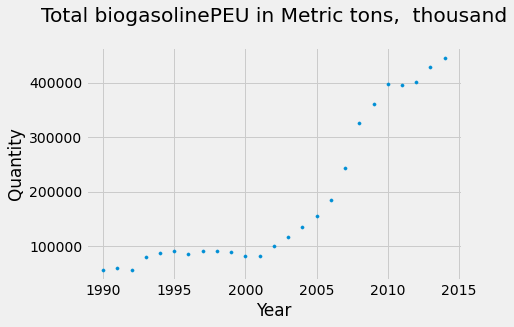

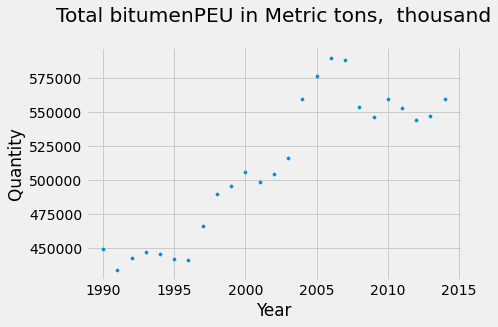

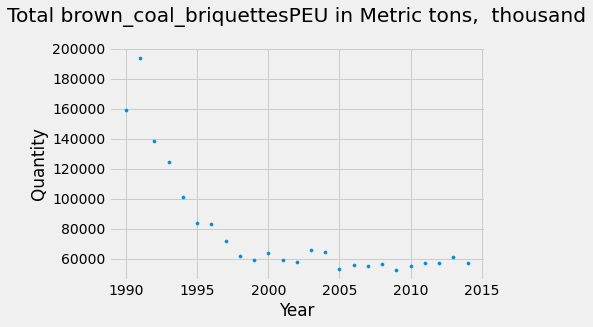

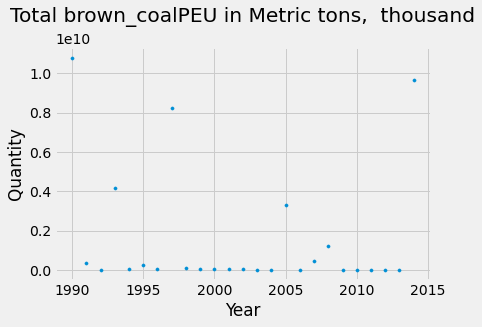

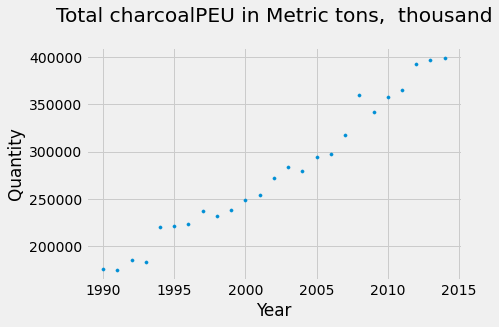

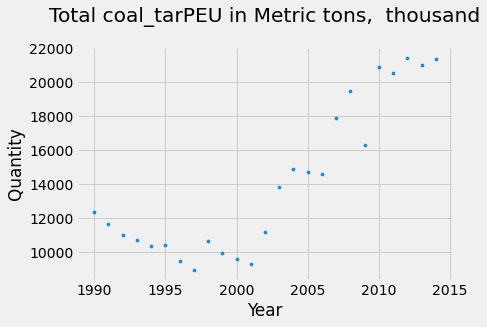

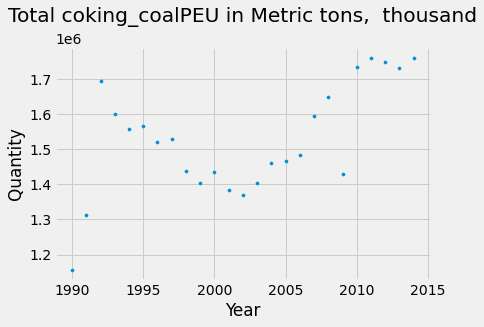

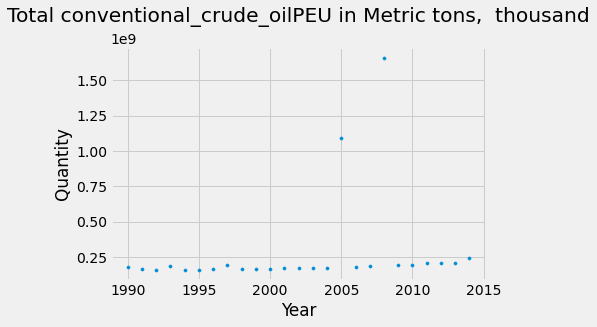

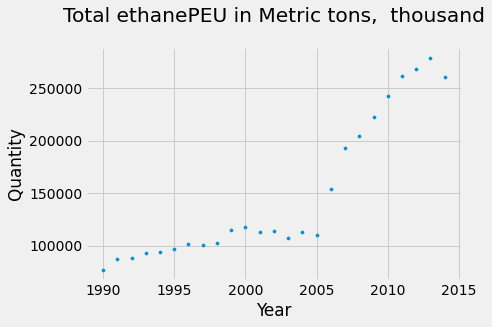

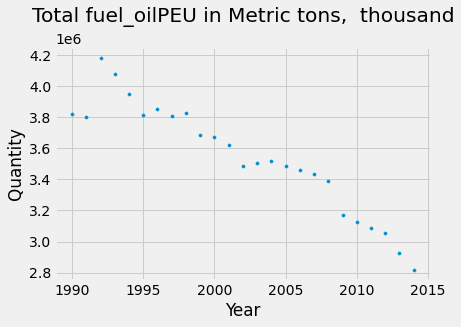

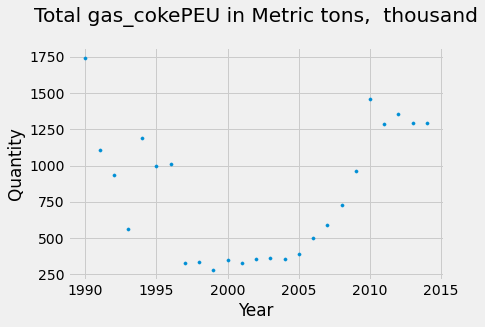

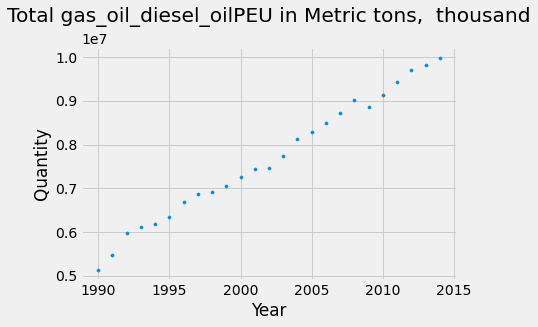

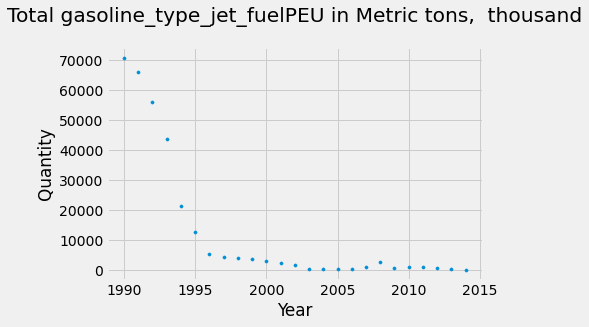

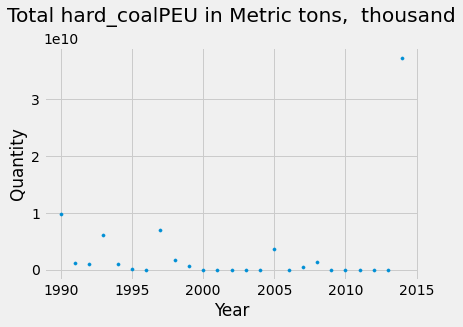

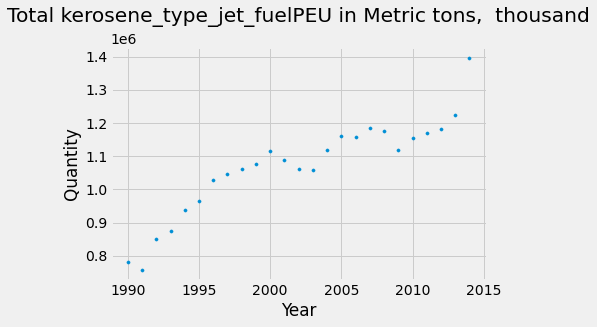

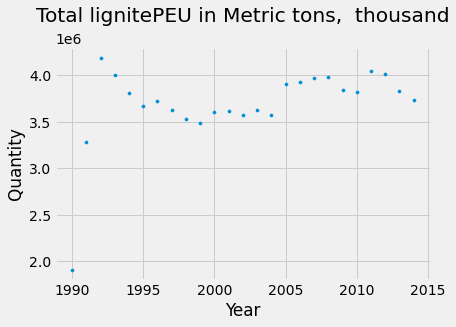

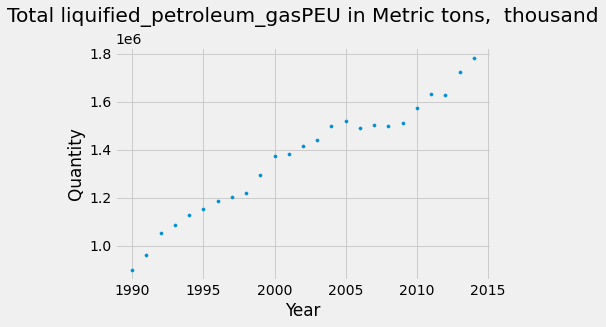

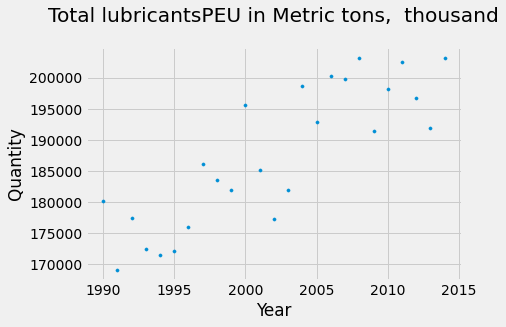

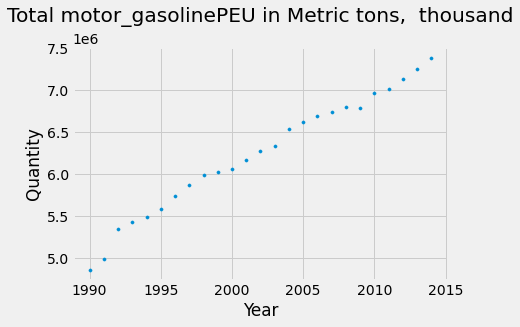

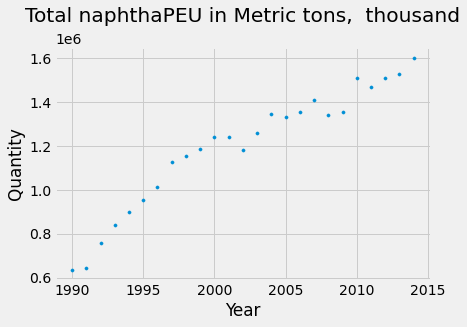

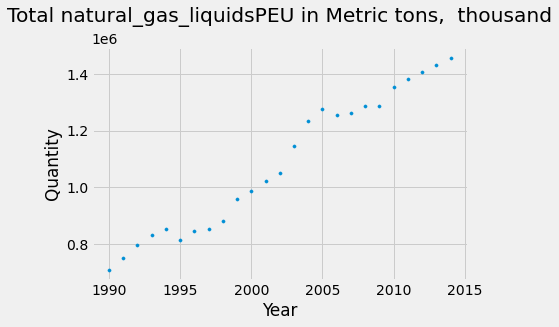

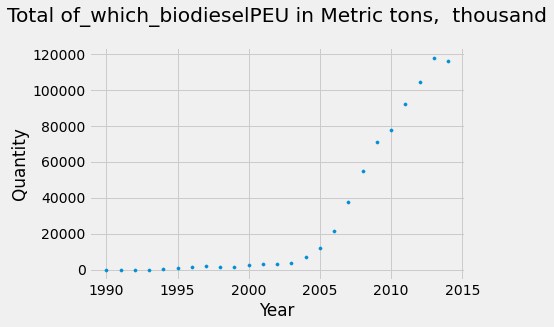

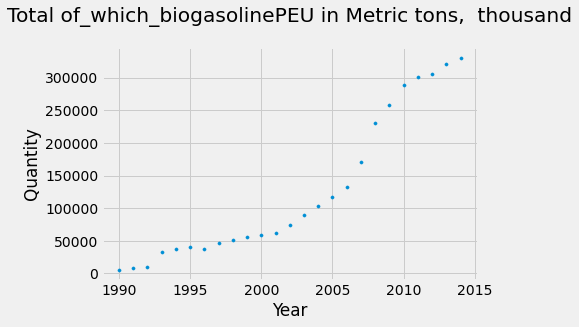

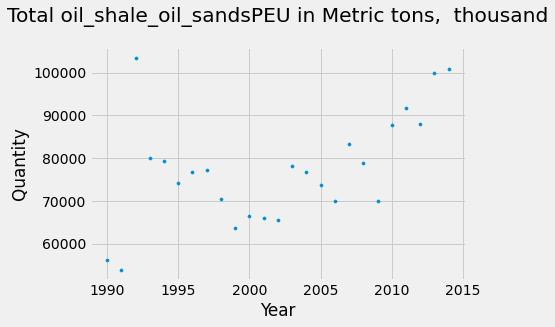

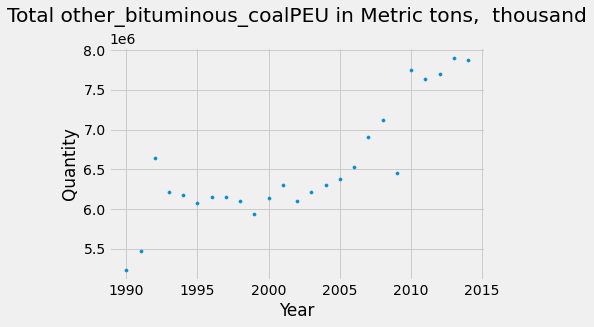

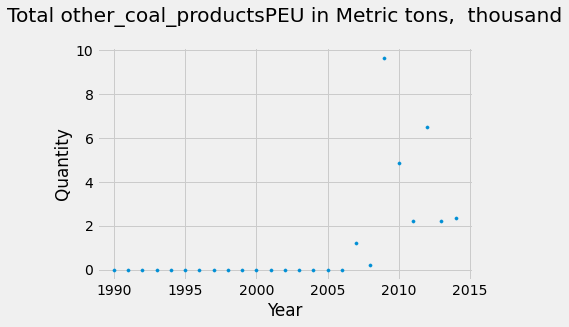

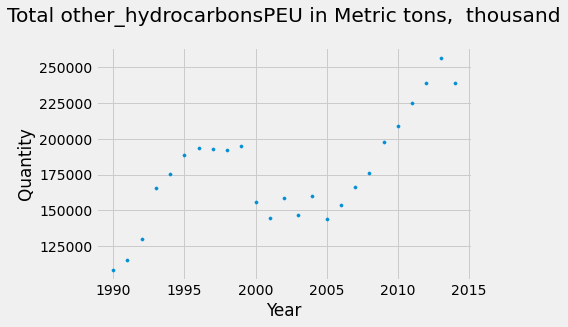

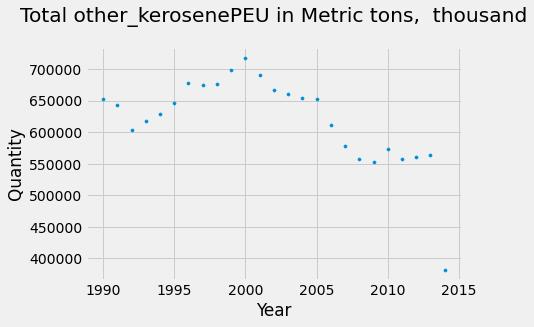

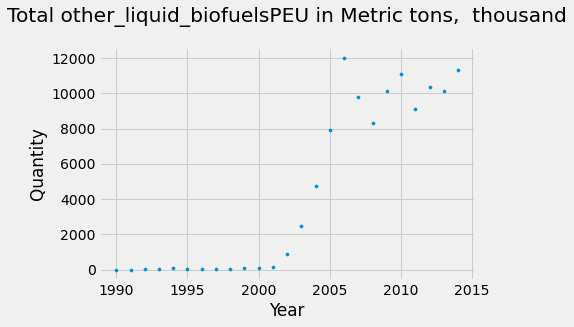

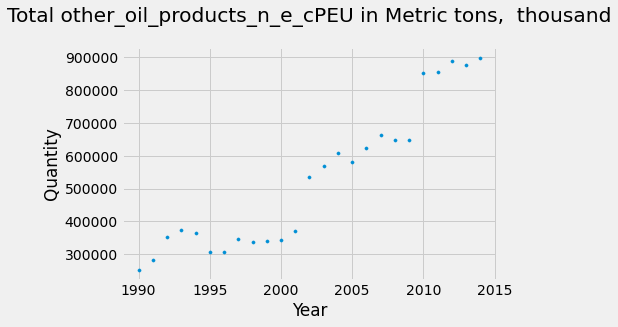

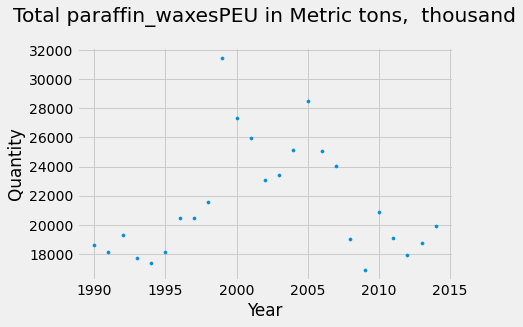

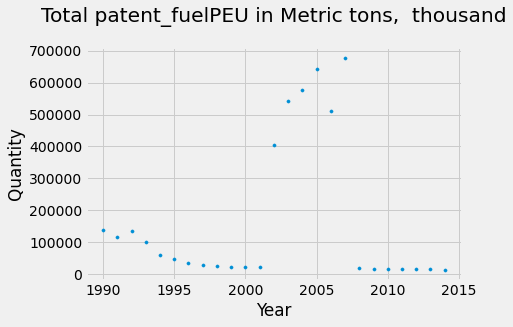

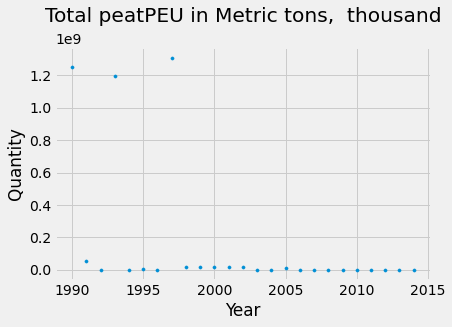

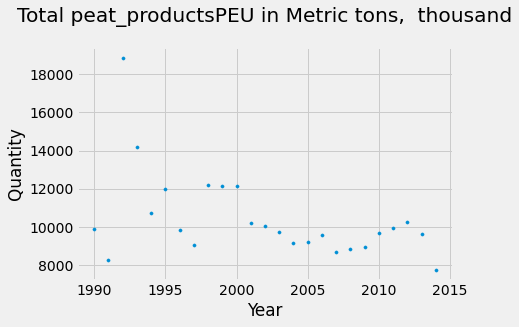

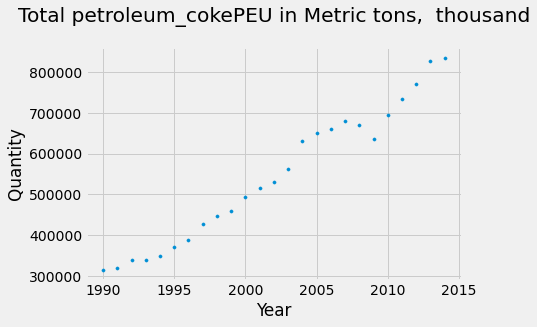

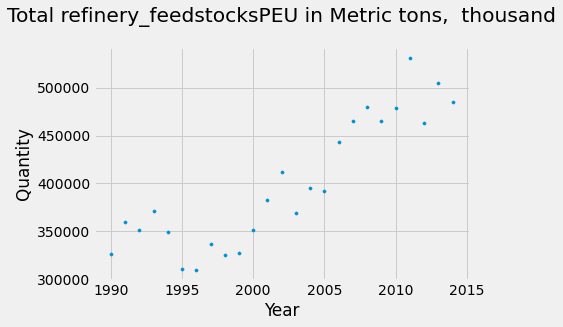

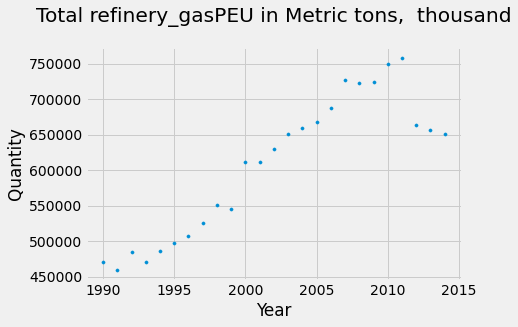

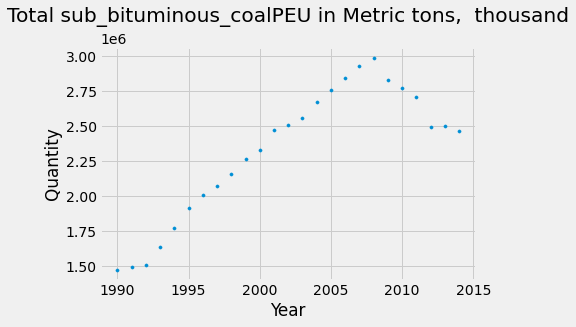

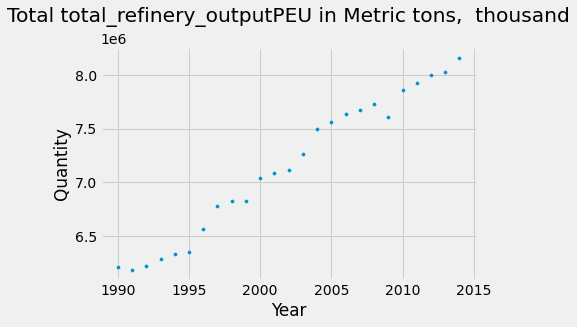

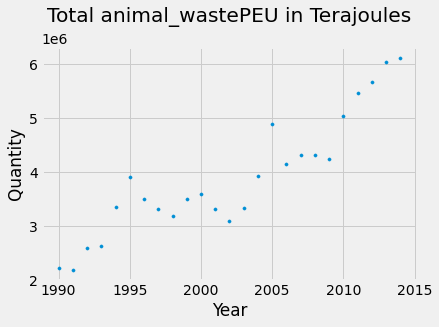

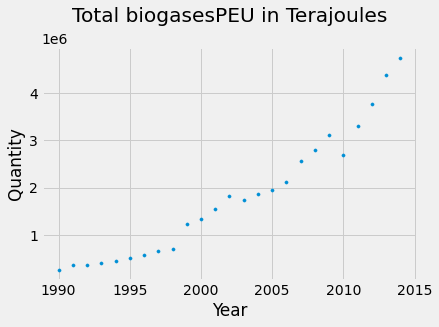

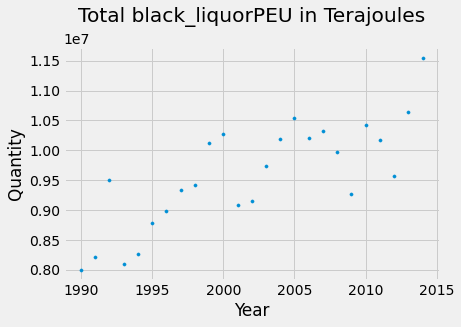

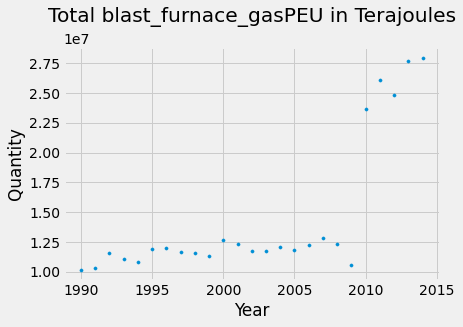

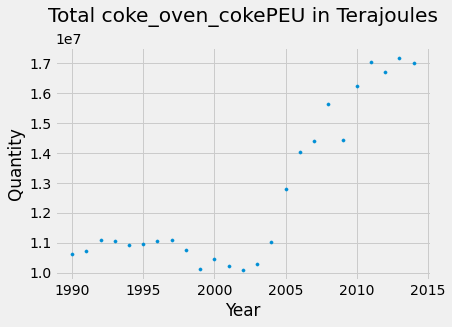

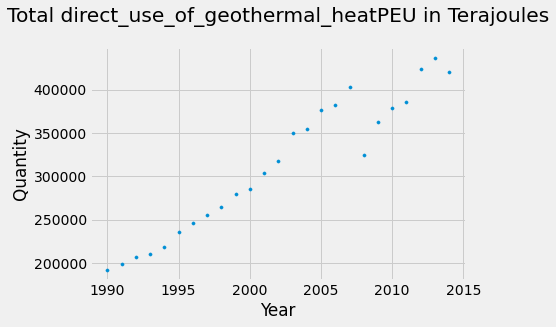

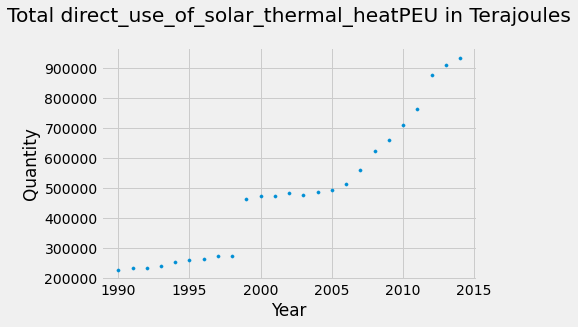

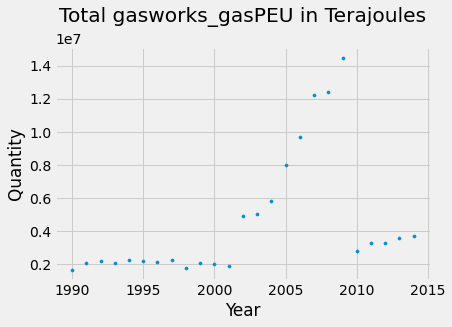

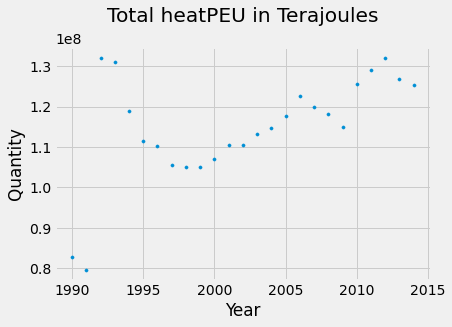

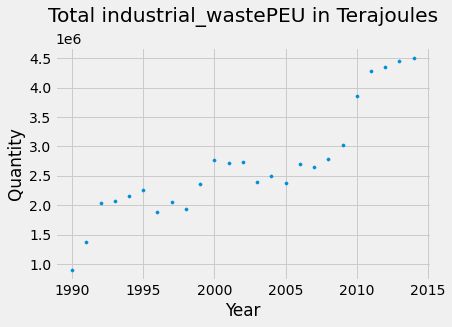

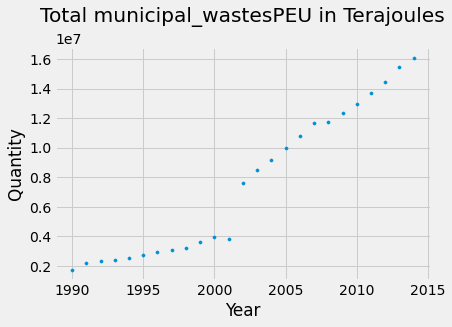

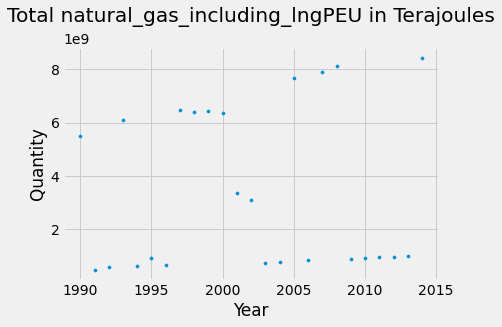

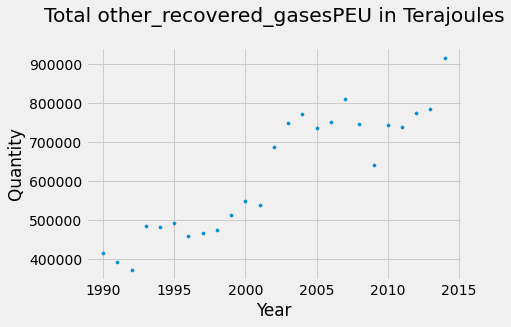

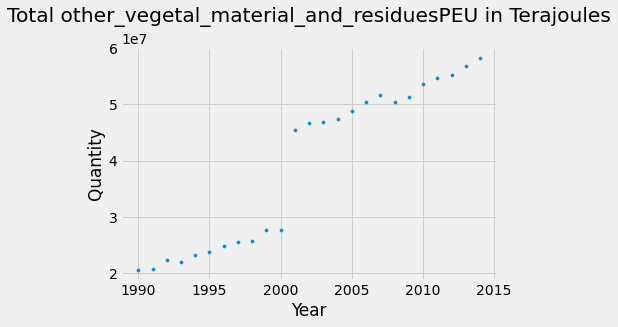

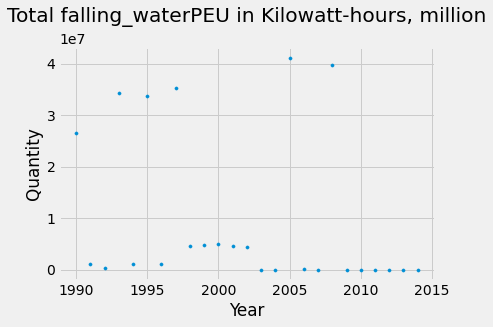

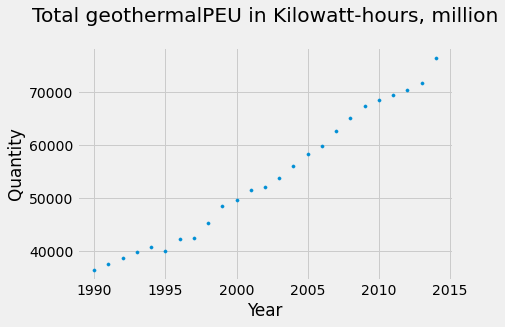

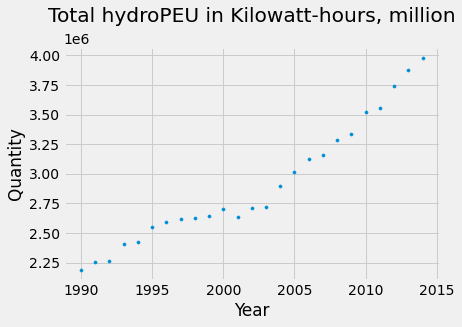

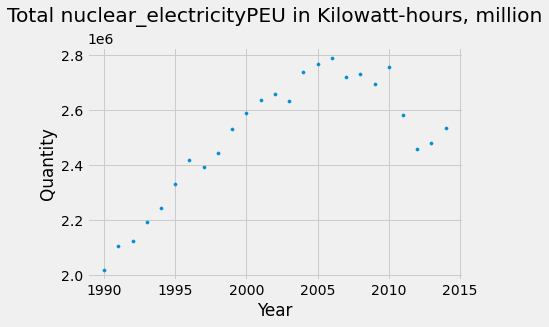

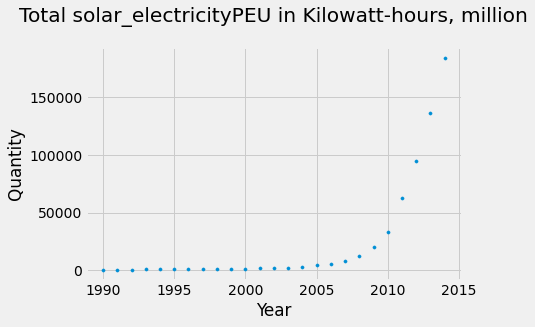

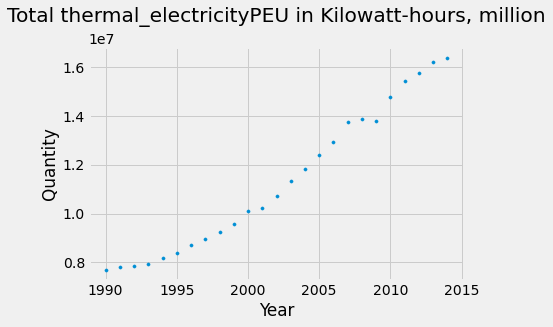

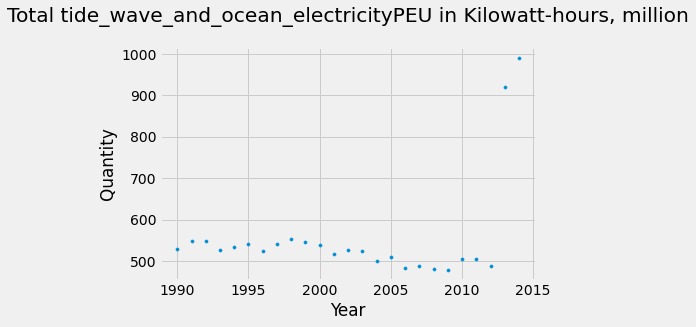

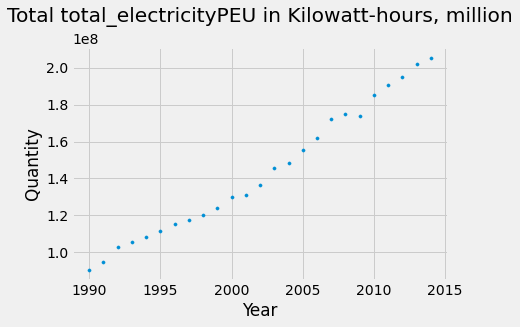

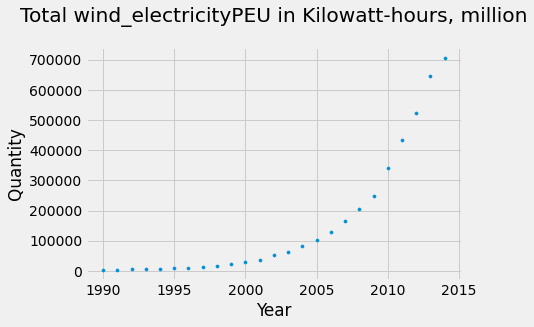

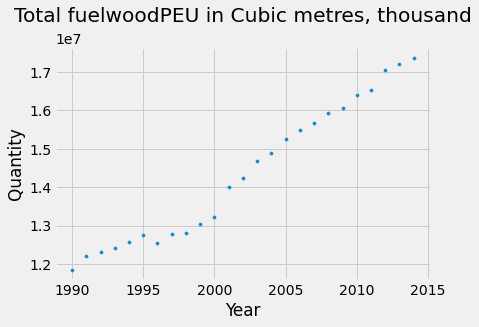

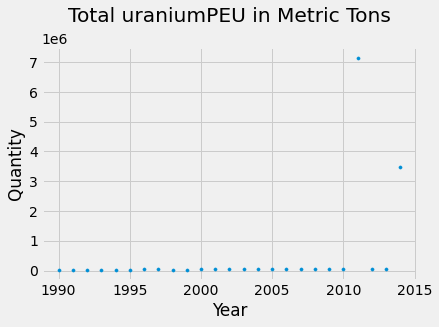

In [43]:
# Visualization of total PEU stats by year - all
import numpy as np

for unit in unittypes:
    energies = [k for k, v in mydict.items() if v == unit]

    for energy in energies:
        times = []
        qtys = []
        for year in years:
            times.append(year)
            df1 = dict_peu_byyear[year]
            df1 = df1[df1["unit"] == unit]
            df1 = df1[df1["category"] == energy]
            # display(HTML(df1.to_html()))
            if not df1.empty:
                # print(df1['total_PEU'].iloc[-1])
                qtys.append(df1["total_PEU"].iloc[-1])
            else:
                qtys.append(0.0)

        order = np.argsort(times)
        xs = np.array(times)[order]
        ys = np.array(qtys)[order]
        plt.figure()
        plt.ylabel("Quantity")
        plt.xlabel("Year")
        plt.scatter(xs, ys, s=10)
        plt.title("Total " + energy + "PEU in " + unit, pad=25)
        plt.savefig(
            "Part2.1_figs/" + "Yearly " + energy + " PEU", bbox_inches="tight", dpi=200
        )

#### Total PEU stats by Country - Bar chart
We want to display the PEU stats of maximum used energy types: Total electricity, hard coal, and natural gas, in a bar chart by country. 

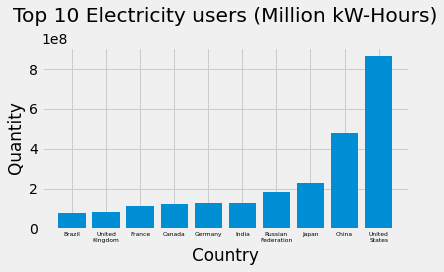

In [62]:
# ELECTRICITY USAGE BY COUNTRY - We want a bar chart of the top 10 electricity producting countries

# First, create the data of each country and each its electricity usage

electricity = "total_electricity"

xs = []
ys = []
for country in countries:
    dataframe = dict_peu_bycountry[country]
    xs.append(country)
    dftemp = dataframe.loc[dataframe["category"] == electricity]
    ys.append(dftemp["total_PEU"].iloc[0])
order = np.argsort(ys)
xs = np.array(xs)[order]
ys = np.array(ys)[order]
xs = xs[len(xs) - 10 : len(xs)]
ys = ys[len(ys) - 10 : len(ys)]
plt.figure()
plt.bar(xs, ys)
formatted_labels = [label.replace(" ", "\n") for label in xs]
plt.xticks(range(len(xs)), formatted_labels, fontsize=6)
plt.title("Top 10 Electricity users (Million kW-Hours)", pad=25)
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.tight_layout()
plt.savefig(fname="Part3_figs/top_10_electricity_users.png", dpi=300)

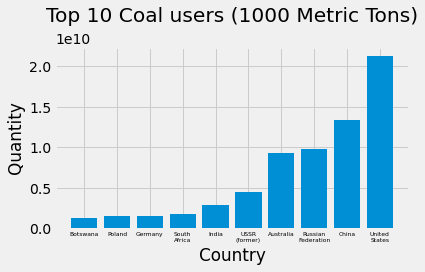

In [63]:
# HARD COAL USAGE BY COUNTRY - We want a bar chart of the top 10 hard coal producting countries

# First, create the data of each country and each its hard coal usage

coal = "hard_coal"

xs = []
ys = []
for country in countries:
    dataframe = dict_peu_bycountry[country]
    xs.append(country)
    dftemp = dataframe.loc[dataframe["category"] == coal]
    ys.append(dftemp["total_PEU"].iloc[0])
order = np.argsort(ys)
xs = np.array(xs)[order]
ys = np.array(ys)[order]
xs = xs[len(xs) - 10 : len(xs)]
ys = ys[len(ys) - 10 : len(ys)]
plt.figure()
plt.bar(xs, ys)
formatted_labels = [label.replace(" ", "\n") for label in xs]
plt.xticks(range(len(xs)), formatted_labels, fontsize=6)
plt.title("Top 10 Coal users (1000 Metric Tons)", pad=25)
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.tight_layout()
plt.savefig(fname="Part3_figs/top_10_coal_users", dpi=300)

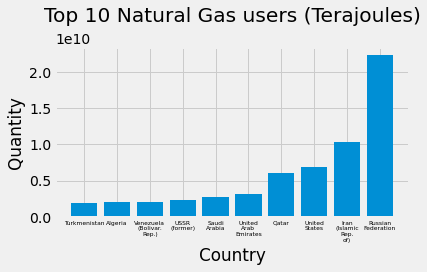

In [64]:
# NATURAL GAS USAGE BY COUNTRY - We want a bar chart of the top 10 electricity producting countries

# First, create the data of each country and each its natural gas usage

naturalgas = "natural_gas_including_lng"

xs = []
ys = []
for country in countries:
    dataframe = dict_peu_bycountry[country]
    xs.append(country)
    dftemp = dataframe.loc[dataframe["category"] == naturalgas]
    ys.append(dftemp["total_PEU"].iloc[0])
order = np.argsort(ys)
xs = np.array(xs)[order]
ys = np.array(ys)[order]
xs = xs[len(xs) - 10 : len(xs)]
ys = ys[len(ys) - 10 : len(ys)]
plt.figure()
plt.bar(xs, ys)
formatted_labels = [label.replace(" ", "\n") for label in xs]
plt.xticks(range(len(xs)), formatted_labels, fontsize=6)
plt.title("Top 10 Natural Gas users (Terajoules)", pad=25)
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.tight_layout()
plt.savefig(fname="Part3_figs/top_10_naturalgas_users.png", dpi=300)